In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import re

import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
from imdbpie import Imdb
imdb = Imdb()
imdb_df = pd.DataFrame(imdb.top_250())

In [3]:
imdb_df.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1785353,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1218676,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,837967,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1766284,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,481261,8.9,tt0050083,12 Angry Men,feature,1957


In [4]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
can_rate     250 non-null bool
image        250 non-null object
num_votes    250 non-null int64
rating       250 non-null float64
tconst       250 non-null object
title        250 non-null object
type         250 non-null object
year         250 non-null object
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 14.0+ KB


In [5]:
url_template = 'http://www.omdbapi.com/?i='
results = []

for i in imdb_df['tconst']:
    URL = url_template + i
    response = requests.get(URL)
    info = response.json()
    results.append(info.values())

In [6]:
results

[[u'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
  u'R',
  u'True',
  u'English',
  u'The Shawshank Redemption',
  u'USA',
  u'Stephen King (short story "Rita Hayworth and Shawshank Redemption"), Frank Darabont (screenplay)',
  u'80',
  u'9.3',
  u'Frank Darabont',
  u'14 Oct 1994',
  u'Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
  u'1994',
  u'Crime, Drama',
  u'Nominated for 7 Oscars. Another 19 wins & 30 nominations.',
  u'142 min',
  u'movie',
  u'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_SX300.jpg',
  u'1,771,273',
  u'tt0111161'],
 [u'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.',
  u'R',
  u'True',
  u'English, Italian, Latin',
  u'The Godfather',
  u'USA',
  u'Mario Puzo (screenplay), Francis Ford Coppola (screenplay), Mario Puzo (novel)',
  u'100',
  u'9.2',
 

In [7]:
omdb = pd.DataFrame(results, columns = ['plot', 'rating', 'response', 'language', 'title', 'country', 'writer(s)', 'metascore', 'imdb_rating', 'director', 'release_date', 'cast', 'year', 'genre', 'awards', 'runtime', 'type', 'poster_url', 'votes', 'id'])

In [8]:
omdb.head()

,plot,rating,response,language,title,country,writer(s),metascore,imdb_rating,director,release_date,cast,year,genre,awards,runtime,type,poster_url,votes,id
0,Two imprisoned men bond over a number of years...,R,True,English,The Shawshank Redemption,USA,"Stephen King (short story ""Rita Hayworth and S...",80,9.3,Frank Darabont,14 Oct 1994,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",1994,"Crime, Drama",Nominated for 7 Oscars. Another 19 wins & 30 n...,142 min,movie,https://images-na.ssl-images-amazon.com/images...,"1,771,273",tt0111161
1,The aging patriarch of an organized crime dyna...,R,True,"English, Italian, Latin",The Godfather,USA,"Mario Puzo (screenplay), Francis Ford Coppola ...",100,9.2,Francis Ford Coppola,24 Mar 1972,"Marlon Brando, Al Pacino, James Caan, Richard ...",1972,"Crime, Drama",Won 3 Oscars. Another 23 wins & 27 nominations.,175 min,movie,https://images-na.ssl-images-amazon.com/images...,"1,209,397",tt0068646
2,The early life and career of Vito Corleone in ...,R,True,"English, Italian, Spanish, Latin, Sicilian",The Godfather: Part II,USA,"Francis Ford Coppola (screenplay), Mario Puzo ...",80,9.0,Francis Ford Coppola,20 Dec 1974,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",1974,"Crime, Drama",Won 6 Oscars. Another 10 wins & 20 nominations.,202 min,movie,https://images-na.ssl-images-amazon.com/images...,"831,783",tt0071562
3,When the menace known as the Joker wreaks havo...,PG-13,True,"English, Mandarin",The Dark Knight,"USA, UK","Jonathan Nolan (screenplay), Christopher Nolan...",82,9.0,Christopher Nolan,18 Jul 2008,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2008,"Action, Crime, Drama",Won 2 Oscars. Another 146 wins & 142 nominations.,152 min,movie,https://images-na.ssl-images-amazon.com/images...,"1,754,213",tt0468569
4,A jury holdout attempts to prevent a miscarria...,APPROVED,True,English,12 Angry Men,USA,"Reginald Rose (story), Reginald Rose (screenplay)",N/A,8.9,Sidney Lumet,01 Apr 1957,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957,"Crime, Drama",Nominated for 3 Oscars. Another 16 wins & 8 no...,96 min,movie,https://images-na.ssl-images-amazon.com/images...,"474,530",tt0050083


In [9]:
# DO NOT RELOAD!
# omdb.to_csv('XXXXX/Users/sidraahmad/DSI-NYC-4/projects/project-6-apis-randomforests/assets/omdb_031417_notclean_utf8.csv', index = False, encoding = 'utf-8')

In [2]:
omdb = pd.read_csv('assets/omdb_031417_notclean_utf8.csv')

In [3]:
omdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
plot            250 non-null object
rating          247 non-null object
response        250 non-null bool
language        249 non-null object
title           250 non-null object
country         250 non-null object
writer(s)       250 non-null object
metascore       162 non-null float64
imdb_rating     250 non-null float64
director        250 non-null object
release_date    248 non-null object
cast            250 non-null object
year            250 non-null int64
genre           250 non-null object
awards          245 non-null object
runtime         250 non-null object
type            250 non-null object
poster_url      250 non-null object
votes           250 non-null object
id              250 non-null object
dtypes: bool(1), float64(2), int64(1), object(16)
memory usage: 37.4+ KB


In [4]:
omdb['response'].value_counts()

True    250
Name: response, dtype: int64

In [5]:
omdb['type'].value_counts()

movie    250
Name: type, dtype: int64

In [6]:
omdb = omdb.drop(['plot', 'response', 'metascore', 'cast', 'type', 'poster_url', 'id'], axis = 1)

In [7]:
omdb[pd.isnull(omdb['rating'])]

,rating,language,title,country,writer(s),imdb_rating,director,release_date,year,genre,awards,runtime,votes
96,NaN,Turkish,My Father and My Son,Turkey,Çagan Irmak,8.7,Çagan Irmak,18 Nov 2005,2005,Drama,11 wins & 1 nomination.,108 min,"40,701"
151,NaN,Turkish,The Bandit,"Turkey, France, Bulgaria",Yavuz Turgul,8.5,Yavuz Turgul,29 Nov 1996,1996,"Crime, Drama, Thriller",2 wins.,128 min,"37,760"
244,NaN,Hindi,Gangs of Wasseypur,India,"Akhilesh Jaiswal, Anurag Kashyap, Sachin K. La...",8.3,Anurag Kashyap,02 Aug 2012,2012,"Action, Crime, Drama",10 wins & 32 nominations.,320 min,"50,643"


In [8]:
omdb['rating'].value_counts()

R            101
PG            38
NOT RATED     31
PG-13         30
APPROVED      20
G             13
UNRATED       10
PASSED         4
Name: rating, dtype: int64

In [9]:
omdb.loc[omdb['rating'] == 'UNRATED', 'rating'] = 'NOT RATED'
omdb.loc[omdb['rating'] == 'PASSED', 'rating'] = 'APPROVED'

In [10]:
omdb.loc[omdb['title'] == 'My Father and My Son', 'rating'] = 'NOT RATED'
omdb.loc[omdb['title'] == 'The Bandit', 'rating'] = 'NOT RATED'
omdb.loc[omdb['title'] == 'Gangs of Wasseypur', 'rating'] = 'R' 
# Source: http://timesofindia.indiatimes.com/entertainment/bollywood/news-interviews/Now-Wasseypur-in-censor-trouble/articleshow/14084556.cms?referral=PM

In [11]:
omdb[pd.isnull(omdb['language'])]

,rating,language,title,country,writer(s),imdb_rating,director,release_date,year,genre,awards,runtime,votes
155,NOT RATED,NaN,Sunrise,USA,"Carl Mayer (scenario), Hermann Sudermann (from...",8.3,F.W. Murnau,04 Nov 1927,1927,"Drama, Romance",Won 3 Oscars. Another 2 wins & 2 nominations.,94 min,"31,257"


In [12]:
omdb.loc[omdb['title'] == 'Sunrise', 'language'] = 'English' 
# Source: https://en.wikipedia.org/wiki/Sunrise:_A_Song_of_Two_Humans

In [13]:
omdb[pd.isnull(omdb['release_date'])]

,rating,language,title,country,writer(s),imdb_rating,director,release_date,year,genre,awards,runtime,votes
128,NOT RATED,"Russian, Italian, Tatar",Andrei Rublev,Soviet Union,"Andrey Konchalovskiy, Andrei Tarkovsky",8.4,Andrei Tarkovsky,NaN,1966,"Biography, Drama, History",3 wins.,205 min,"24,697"
135,NOT RATED,English,The Gold Rush,USA,Charles Chaplin,8.2,Charles Chaplin,NaN,1925,"Adventure, Comedy, Drama",Nominated for 2 Oscars. Another 3 wins & 1 nom...,95 min,"71,750"


In [14]:
omdb.loc[omdb['title'] == 'Andrei Rublev', 'release_date'] = '16 Dec 1966' 
# Source: https://en.wikipedia.org/wiki/Andrei_Rublev_(film)#Distribution
# The closest things I found to the date was December 1966, so I assigned the date as the 16th for the middle of the month.
omdb.loc[omdb['title'] == 'The Gold Rush', 'release_date'] = '16 Aug 1925' 
# Source: http://www.afi.com/members/catalog/DetailView.aspx?s=&Movie=9427

In [15]:
omdb['release_date'] = omdb['release_date'].apply(lambda x: pd.to_datetime(x))

In [16]:
omdb[pd.isnull(omdb['awards'])]

,rating,language,title,country,writer(s),imdb_rating,director,release_date,year,genre,awards,runtime,votes
50,R,English,Logan,USA,"James Mangold (story by), Scott Frank (screenp...",8.7,James Mangold,2017-03-03,2017,"Action, Drama, Sci-Fi",NaN,135 min,"112,000"
103,R,Italian,For a Few Dollars More,"Italy, Spain, West Germany","Sergio Leone (scenario), Fulvio Morsella (scen...",8.3,Sergio Leone,1967-05-10,1965,Western,NaN,132 min,"167,319"
180,R,"English, Latin",Life of Brian,UK,"Graham Chapman, John Cleese, Terry Gilliam, Er...",8.1,Terry Jones,1979-08-17,1979,Comedy,NaN,94 min,"282,950"
211,G,"English, Japanese",Hachi: A Dog's Tale,"UK, USA","Stephen P. Lindsey (screenplay), Kaneto Shindô...",8.1,Lasse Hallström,2010-03-12,2009,"Drama, Family",NaN,93 min,"168,627"
238,PG,"English, Arabic",The Message,"Lebanon, Libya, Kuwait, Morocco, UK","H.A.L. Craig, Tewfik El-Hakim, A.B. Jawdat El-...",8.4,Moustapha Akkad,1977-07-08,1976,"Adventure, Biography, Drama",NaN,177 min,"33,768"


In [17]:
omdb.loc[omdb['title'] == 'Logan', 'awards'] = 'Won 0 Oscars.' 
# Source:
omdb.loc[omdb['title'] == 'For a Few Dollars More', 'awards'] = 'Won 0 Oscars.' 
# Source: https://en.wikipedia.org/wiki/For_a_Few_Dollars_More#Critical_Reception
omdb.loc[omdb['title'] == 'Life of Brian', 'awards'] = 'Won 0 Oscars.' 
# Source: http://www.imdb.com/title/tt0079470/awards
omdb.loc[omdb['title'] == 'Hachi: A Dog\'s Tale', 'awards'] = 'Won 0 Oscars.' 
# Source: http://www.imdb.com/title/tt1028532/awards
omdb.loc[omdb['title'] == 'The Message', 'awards'] = 'Won 0 Oscars. Another 1 nomination.' 
# Source: http://www.imdb.com/title/tt0074896/awards

In [18]:
omdb.head()

,rating,language,title,country,writer(s),imdb_rating,director,release_date,year,genre,awards,runtime,votes
0,R,English,The Shawshank Redemption,USA,"Stephen King (short story ""Rita Hayworth and S...",9.3,Frank Darabont,1994-10-14,1994,"Crime, Drama",Nominated for 7 Oscars. Another 19 wins & 30 n...,142 min,"1,771,273"
1,R,"English, Italian, Latin",The Godfather,USA,"Mario Puzo (screenplay), Francis Ford Coppola ...",9.2,Francis Ford Coppola,1972-03-24,1972,"Crime, Drama",Won 3 Oscars. Another 23 wins & 27 nominations.,175 min,"1,209,397"
2,R,"English, Italian, Spanish, Latin, Sicilian",The Godfather: Part II,USA,"Francis Ford Coppola (screenplay), Mario Puzo ...",9.0,Francis Ford Coppola,1974-12-20,1974,"Crime, Drama",Won 6 Oscars. Another 10 wins & 20 nominations.,202 min,"831,783"
3,PG-13,"English, Mandarin",The Dark Knight,"USA, UK","Jonathan Nolan (screenplay), Christopher Nolan...",9.0,Christopher Nolan,2008-07-18,2008,"Action, Crime, Drama",Won 2 Oscars. Another 146 wins & 142 nominations.,152 min,"1,754,213"
4,APPROVED,English,12 Angry Men,USA,"Reginald Rose (story), Reginald Rose (screenplay)",8.9,Sidney Lumet,1957-04-01,1957,"Crime, Drama",Nominated for 3 Oscars. Another 16 wins & 8 no...,96 min,"474,530"


In [19]:
omdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
rating          250 non-null object
language        250 non-null object
title           250 non-null object
country         250 non-null object
writer(s)       250 non-null object
imdb_rating     250 non-null float64
director        250 non-null object
release_date    250 non-null datetime64[ns]
year            250 non-null int64
genre           250 non-null object
awards          250 non-null object
runtime         250 non-null object
votes           250 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 25.5+ KB


In [20]:
omdb['oscars_won'] = [x.split('. ') for x in omdb['awards']]

In [21]:
omdb.head()

,rating,language,title,country,writer(s),imdb_rating,director,release_date,year,genre,awards,runtime,votes,oscars_won
0,R,English,The Shawshank Redemption,USA,"Stephen King (short story ""Rita Hayworth and S...",9.3,Frank Darabont,1994-10-14,1994,"Crime, Drama",Nominated for 7 Oscars. Another 19 wins & 30 n...,142 min,"1,771,273","[Nominated for 7 Oscars, Another 19 wins & 30 ..."
1,R,"English, Italian, Latin",The Godfather,USA,"Mario Puzo (screenplay), Francis Ford Coppola ...",9.2,Francis Ford Coppola,1972-03-24,1972,"Crime, Drama",Won 3 Oscars. Another 23 wins & 27 nominations.,175 min,"1,209,397","[Won 3 Oscars, Another 23 wins & 27 nominations.]"
2,R,"English, Italian, Spanish, Latin, Sicilian",The Godfather: Part II,USA,"Francis Ford Coppola (screenplay), Mario Puzo ...",9.0,Francis Ford Coppola,1974-12-20,1974,"Crime, Drama",Won 6 Oscars. Another 10 wins & 20 nominations.,202 min,"831,783","[Won 6 Oscars, Another 10 wins & 20 nominations.]"
3,PG-13,"English, Mandarin",The Dark Knight,"USA, UK","Jonathan Nolan (screenplay), Christopher Nolan...",9.0,Christopher Nolan,2008-07-18,2008,"Action, Crime, Drama",Won 2 Oscars. Another 146 wins & 142 nominations.,152 min,"1,754,213","[Won 2 Oscars, Another 146 wins & 142 nominati..."
4,APPROVED,English,12 Angry Men,USA,"Reginald Rose (story), Reginald Rose (screenplay)",8.9,Sidney Lumet,1957-04-01,1957,"Crime, Drama",Nominated for 3 Oscars. Another 16 wins & 8 no...,96 min,"474,530","[Nominated for 3 Oscars, Another 16 wins & 8 n..."


In [22]:
omdb['oscars_won'] = [x[0].split(' ')[1] for x in omdb['oscars_won']]
omdb['oscars_won'].value_counts()

for             85
wins            34
1               32
2               21
4               16
3               15
wins.           11
5                9
6                5
7                5
0                5
8                4
nominations.     3
win              2
11               2
win.             1
Name: oscars_won, dtype: int64

In [23]:
omdb.loc[omdb['oscars_won'] == 'for', 'oscars_won'] = 0
omdb.loc[omdb['oscars_won'] == 'wins', 'oscars_won'] = 0
omdb.loc[omdb['oscars_won'] == 'wins.', 'oscars_won'] = 0
omdb.loc[omdb['oscars_won'] == 'nominations.', 'oscars_won'] = 0
omdb.loc[omdb['oscars_won'] == 'win', 'oscars_won'] = 0
omdb.loc[omdb['oscars_won'] == 'win.', 'oscars_won'] = 0

In [24]:
omdb['oscars_won'] = omdb['oscars_won'].astype('float')

In [25]:
omdb['runtime'] = [x.replace(' min', '') if ' min' in x else x for x in omdb['runtime']]
omdb['runtime'] = omdb['runtime'].astype('float')

In [26]:
omdb['votes'] = [x.replace(',', '') if ',' in x else x for x in omdb['votes']]
omdb['votes'] = omdb['votes'].astype('float')

In [27]:
omdb['rank'] = omdb.index
omdb['rank'] = [x + 1 for x in omdb['rank']]

In [28]:
omdb['writer(s)'] = omdb['writer(s)'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
omdb['writer(s)'] = [x.replace(' ,', ',') for x in omdb['writer(s)']]
omdb['writer(s)'] = [x.strip() for x in omdb['writer(s)']]
omdb['writer(s)'] = [x.split(',') for x in omdb['writer(s)']]

In [29]:
def remove_dupes(alist):
    new_list = []
    for i in alist:
        i = i.strip()
        if i not in new_list:
            new_list.append(i)
        else:
            pass
    return new_list

In [30]:
omdb['writer(s)'] = omdb['writer(s)'].apply(lambda x: remove_dupes(x))
omdb['writer(s)'] = omdb['writer(s)'].apply(lambda x: sorted(x, key = str.lower))

In [31]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 
          'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
          'Thriller', 'War', 'Western']

for genre in genres:
    sub_list = []
    for i in range(len(omdb)):
        if genre in omdb['genre'][i]:
            sub_list.append(1)
        else:
            sub_list.append(0)
    omdb[genre] = sub_list

In [32]:
countries = ['USA', 'UK', 'India', 'Japan', 'France', 'Germany', 'Sweden', 'Italy', 'Soviet Union', 'Canada',
             'South Korea', 'Australia', 'Argentina', 'Spain', 'New Zealand', 'Denmark', 'Turkey', 'Bulgaria',
             'Algeria', 'West Germany', 'Lebanon', 'Libya', 'Kuwait', 'Morocco', 'Mexico', 'Ireland', 'Belgium',
             'Luxembourg', 'Poland', 'Hong Kong', 'Austria', 'Switzerland', 'South Africa', 'Iran', 
             'United Arab Emirates', 'Iceland', 'Brazil']

for country in countries:
    sub_list = []
    for i in range(len(omdb)):
        if country in omdb['country'][i]:
            sub_list.append(1)
        else:
            sub_list.append(0)
    omdb[country] = sub_list

In [33]:
# Directors with at least 3 movies in the Top 250 

directors = ['Christopher Nolan', 'Steven Spielberg', 'Stanley Kubrick', 'Alfred Hitchcock', 'Martin Scorsese', 
             'Hayao Miyazaki', 'Billy Wilder', 'Charles Chaplin', 'Akira Kurosawa', 'Quentin Tarantino',
             'Sergio Leone', 'Sidney Lumet', 'James Cameron', 'Clint Eastwood', 'Frank Capra', 'Ridley Scott',
             'Ingmar Bergman', 'David Fincher', 'Peter Jackson', 'Francis Ford Coppola']

for director in directors:
    sub_list = []
    for i in range(len(omdb)):
        if director in omdb['director'][i]:
            sub_list.append(1)
        else:
            sub_list.append(0)
    omdb[director] = sub_list

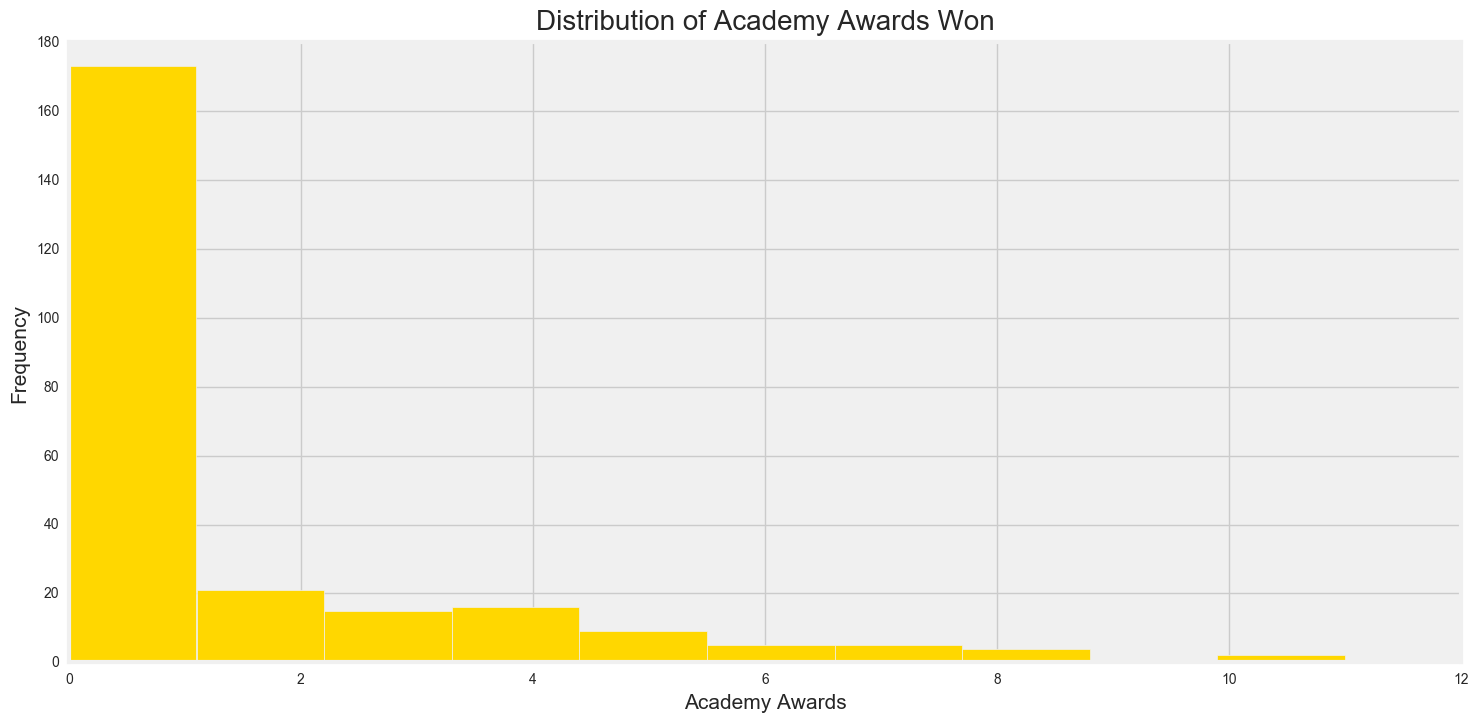

In [34]:
ax = omdb['oscars_won'].hist(figsize = (16, 8), color = 'gold')
ax.set_title('Distribution of Academy Awards Won', fontsize = 20, y = 1.01)
ax.set_xlabel('Academy Awards', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

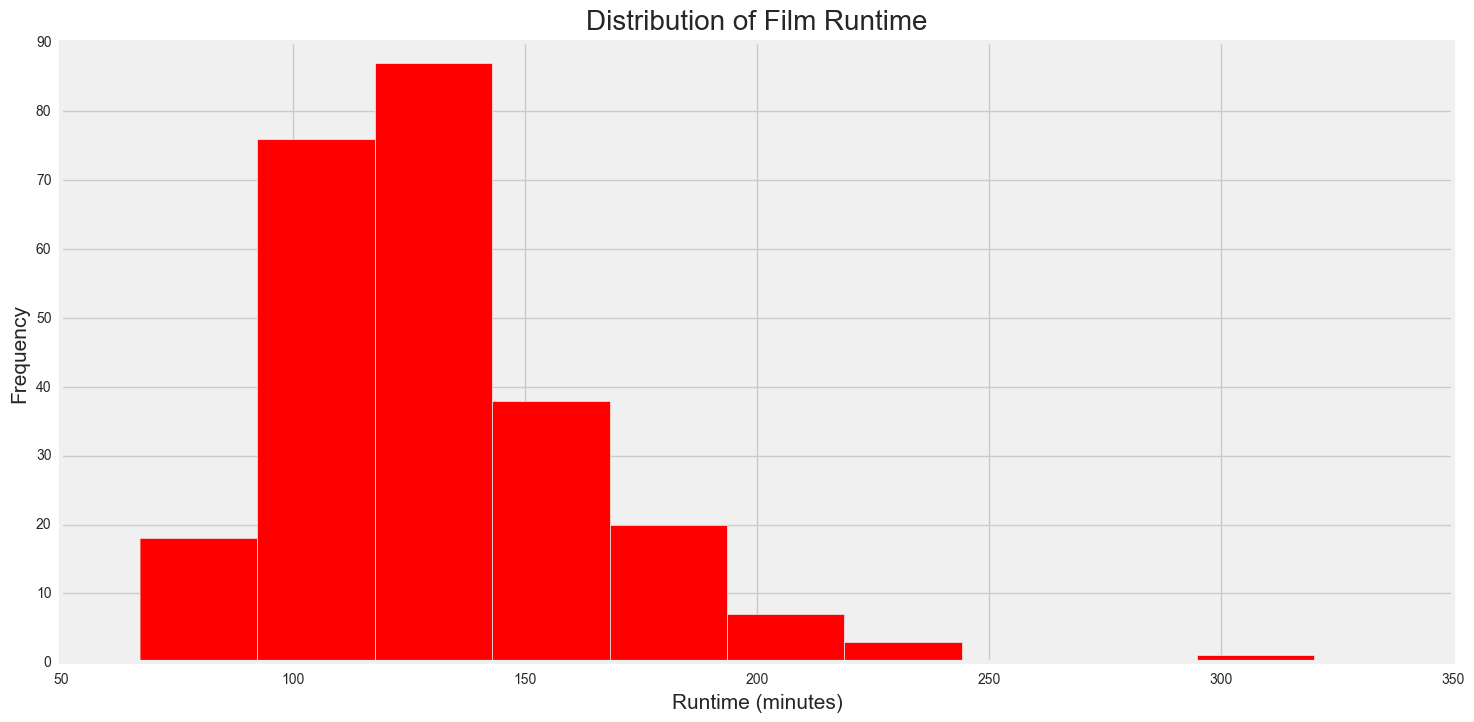

In [35]:
ax = omdb['runtime'].hist(figsize = (16, 8), color = 'red')
ax.set_title('Distribution of Film Runtime', fontsize = 20, y = 1.01)
ax.set_xlabel('Runtime (minutes)', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

In [36]:
ratings = {'NOT RATED': 0, 'APPROVED': 1, 'G': 2, 'PG': 3, 'PG-13': 4, 'R': 5}

omdb['rating_colors'] = [ratings[x] for x in omdb['rating']]

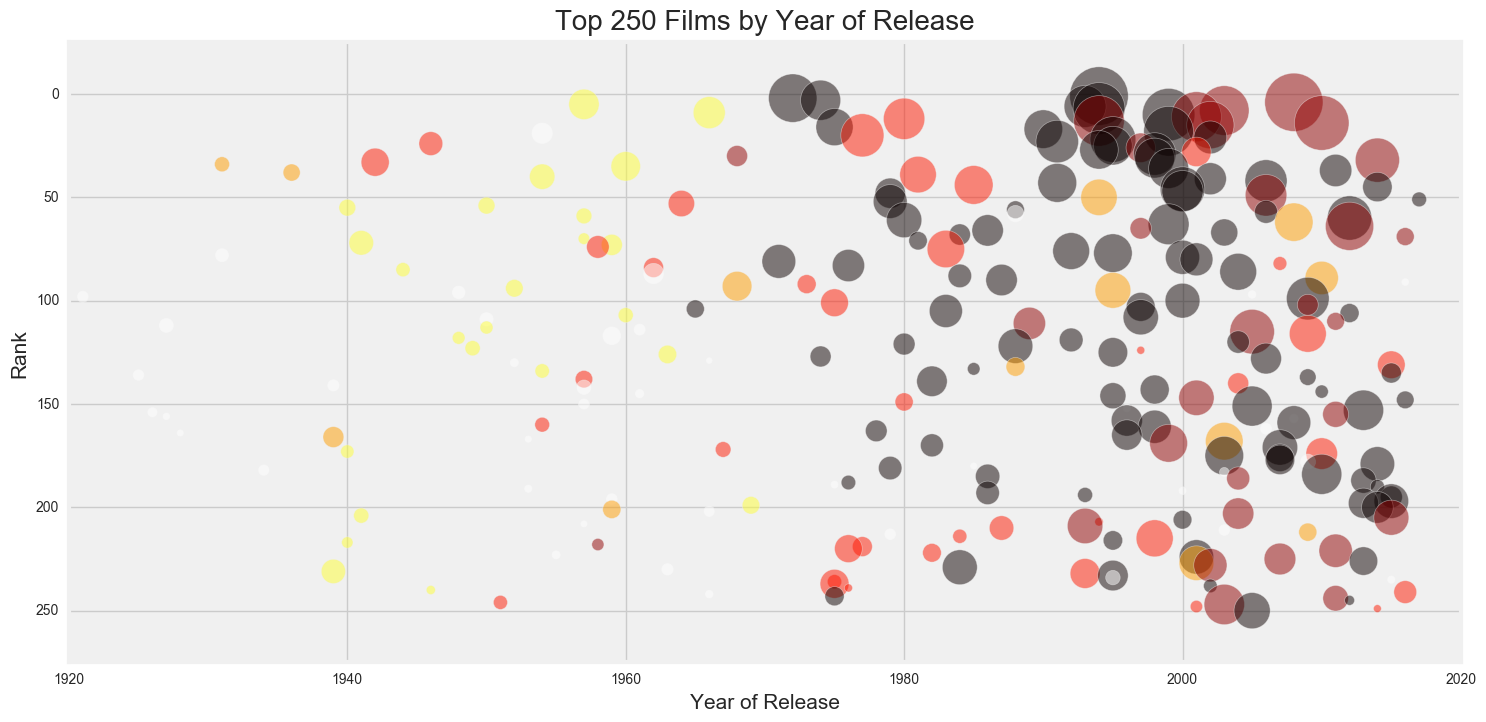

In [37]:
plt.figure(figsize = (16, 8))
plt.title('Top 250 Films by Year of Release', fontsize = 20, y = 1.01)
plt.xlabel('Year of Release', fontsize = 15)
plt.xlim([1920, 2020])
plt.ylabel('Rank', fontsize = 15)
plt.ylim([275, -25])

x = omdb['year']
y = omdb['rank']
area = omdb['votes'] * .001

plt.scatter(x, y, s = area, c = omdb['rating_colors'], alpha = 0.5, cmap = 'hot_r')
plt.show()

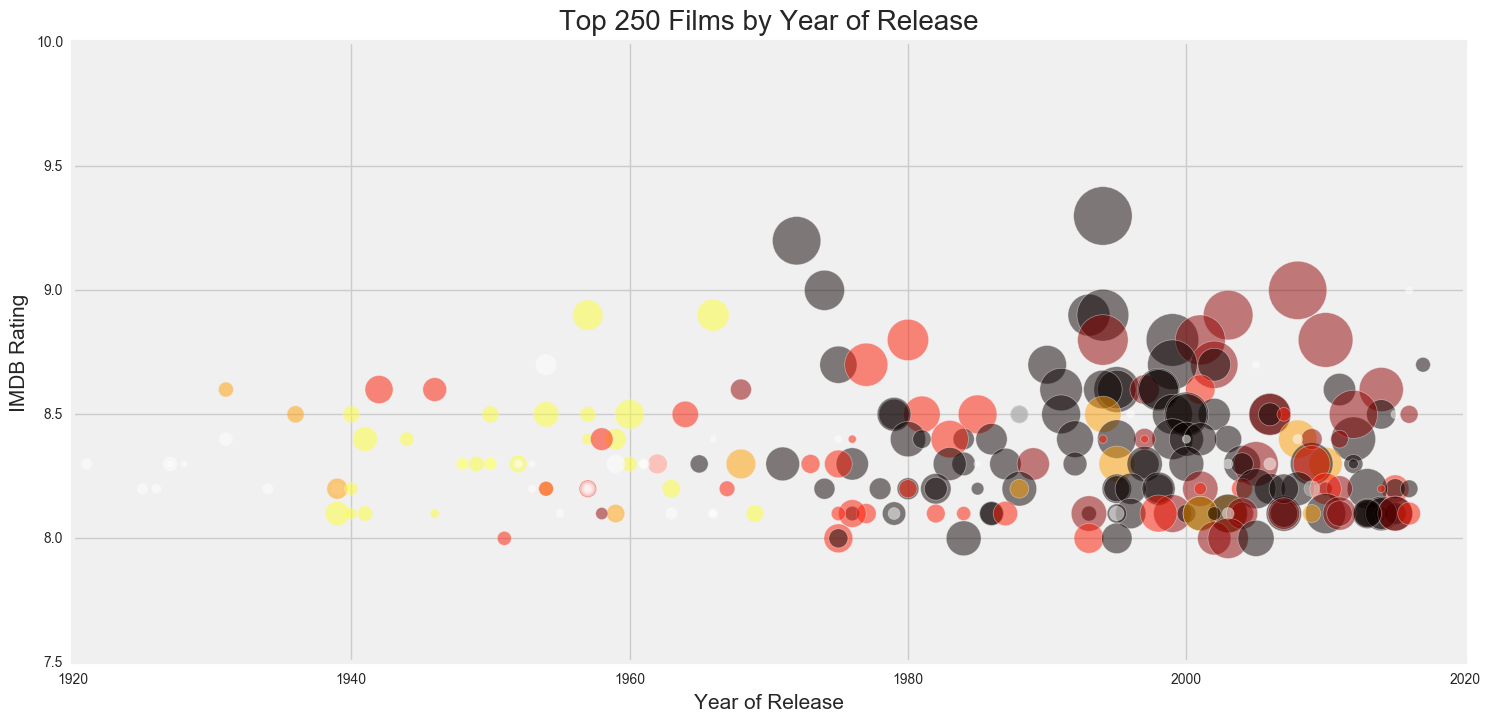

In [38]:
plt.figure(figsize = (16, 8))
plt.title('Top 250 Films by Year of Release', fontsize = 20, y = 1.01)
plt.xlabel('Year of Release', fontsize = 15)
plt.xlim([1920, 2020])
plt.ylabel('IMDB Rating', fontsize = 15)
plt.ylim([7.5, 10])

x = omdb['year']
y = omdb['imdb_rating']
area = omdb['votes'] * .001

plt.scatter(x, y, s = area, c = omdb['rating_colors'], alpha = 0.5, cmap = 'hot_r')
plt.show()

In [39]:
X = omdb.drop(['imdb_rating', 'release_date', 'rating', 'language', 'title', 'country', 'writer(s)', 'director', 'genre', 
               'awards', 'rank', 'rating_colors'], axis = 1)
y = omdb['imdb_rating']

In [40]:
X_stand = StandardScaler().fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size = .33, random_state = 2)

In [42]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
base_r2 = lr.score(X_train, y_train)
mean_abs_coeff = abs(lr.coef_).mean()
mean_cv_r2 = cross_val_score(lr, X_train, y_train, cv = 10).mean()
mean_cv_mse = cross_val_score(lr, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error').mean()

yhat_lr = lr.predict(X_test)

from sklearn.metrics import r2_score

pred_r2 =  r2_score(y_true = y_test, y_pred = yhat_lr)

print 'Base regression R2 Score:', base_r2
print 'Mean abs. coeff:', mean_abs_coeff
print 'Mean cross val. R^2:', mean_cv_r2
print 'Mean cross val. MSE:', mean_cv_mse
print 'Prediction R2 Score:', pred_r2

Base regression R2 Score: 0.682672213319
Mean abs. coeff: 2043392731.69
Mean cross val. R^2: -5.90009240473e+24
Mean cross val. MSE: -1.87027670905e+23
Prediction R2 Score: -3.6615480102e+12


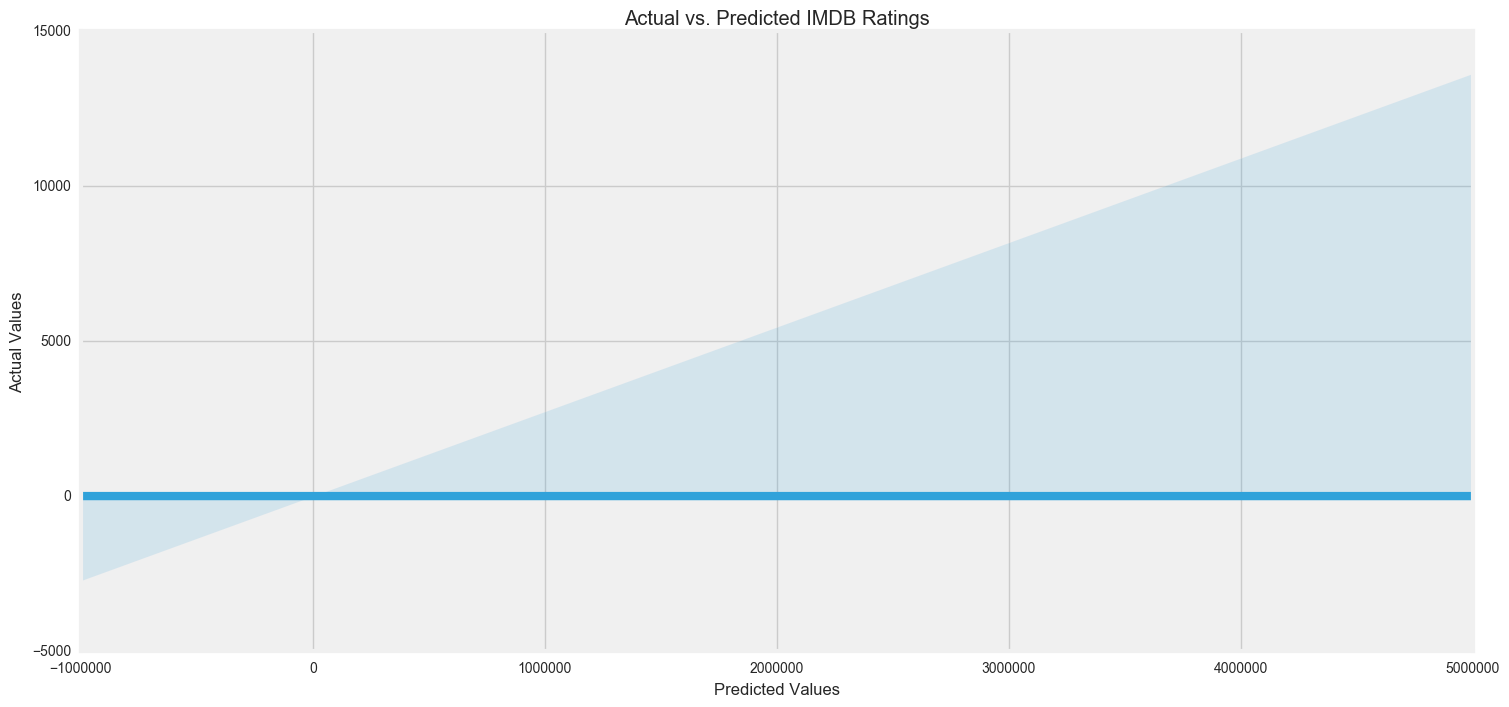

In [43]:
ax = sns.regplot(yhat_lr, y_test)
ax.figure.set_figheight(8)
ax.figure.set_figwidth(16)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Actual vs. Predicted IMDB Ratings')

In [44]:
L1 = linear_model.Lasso()

L1.fit(X_train, y_train)
base_r2 = L1.score(X_train, y_train)
mean_abs_coeff = abs(L1.coef_).mean()
mean_cv_r2 = cross_val_score(L1, X_train, y_train, cv = 10).mean()
mean_cv_mse = cross_val_score(L1, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error').mean()

yhat_L1 = L1.predict(X_test)

pred_r2 =  r2_score(y_true = y_test, y_pred = yhat_L1)

print 'Base regression R2 Score:', base_r2
print 'Mean abs. coeff:', mean_abs_coeff
print 'Mean cross val. R^2:', mean_cv_r2
print 'Mean cross val. MSE:', mean_cv_mse
print 'Prediction R2 Score:', pred_r2

Base regression R2 Score: 0.0
Mean abs. coeff: 0.0
Mean cross val. R^2: -0.13746130178
Mean cross val. MSE: -0.0492955001393
Prediction R2 Score: -0.0231477828482


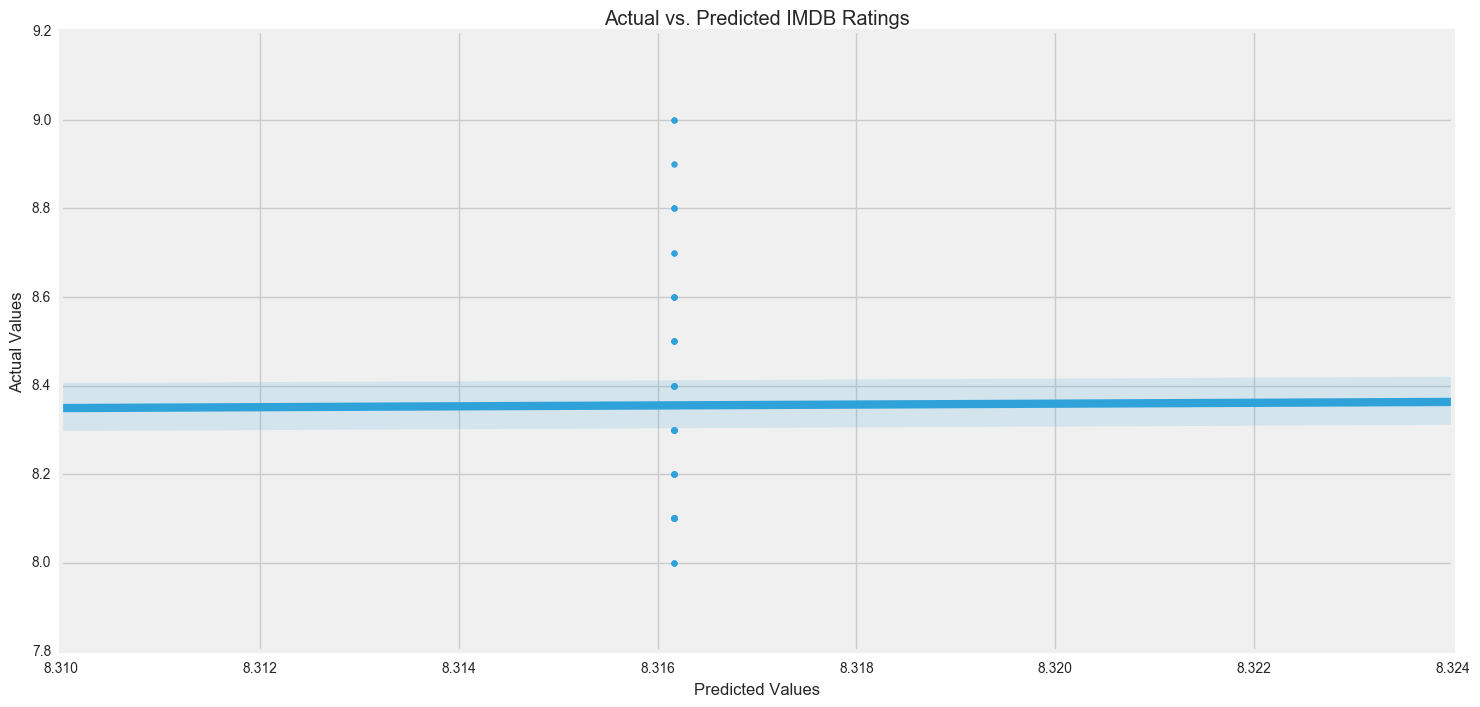

In [45]:
ax = sns.regplot(yhat_L1, y_test)
ax.figure.set_figheight(8)
ax.figure.set_figwidth(16)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Actual vs. Predicted IMDB Ratings')

In [46]:
RCV = linear_model.RidgeCV(alphas = (.001, .001, .01, .1, .5, 1, 5, 10), cv = 10)

RCV.fit(X_train, y_train)
base_r2 = RCV.score(X_train, y_train)
mean_abs_coeff = abs(RCV.coef_).mean()

opt_alpha = RCV.alpha_

yhat_RCV = RCV.predict(X_test)

pred_r2 =  r2_score(y_true = y_test, y_pred = yhat_RCV)

print 'Base regression R2 Score:', base_r2
print 'Mean abs. coeff:', mean_abs_coeff
print 'Optimal alpha:', opt_alpha
print 'Prediction R2 Score:', pred_r2

Base regression R2 Score: 0.666479420707
Mean abs. coeff: 0.0146732082706
Optimal alpha: 10
Prediction R2 Score: 0.32205661989


In [47]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)

In [48]:
mse_knn = mean_squared_error(y_test, yhat)
mse_knn

0.063224096385542244

In [49]:
neighbors = [3, 4, 5, 6, 7, 8, 9, 10]
weights_list = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
power = [1, 2]

gs = GridSearchCV(knn, {'n_neighbors': neighbors,
                        'weights': weights_list, 
                        'algorithm': algorithms, 
                        'p': power}, verbose = False, cv = 10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=False)

In [50]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}

In [51]:
gs.best_score_

-0.032866189224999801

In [52]:
opt_knn = KNeighborsRegressor(n_neighbors = gs.best_params_['n_neighbors'], 
                              weights = gs.best_params_['weights'], 
                              algorithm = gs.best_params_['algorithm'], 
                              p = gs.best_params_['p'])

gs_knn = opt_knn.fit(X_train, y_train)

In [53]:
gs_yhat = gs_knn.predict(X_test)

In [54]:
mse_gs = mean_squared_error(y_test, gs_yhat)
mse_gs

0.064706325301204903

In [55]:
rf = RandomForestRegressor(max_depth = 5)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [56]:
mse_rf = mean_squared_error(y_test, rf_yhat)
mse_rf

0.038539126006781881

In [57]:
estim = [10, 12, 15, 20]
depth = [3, 4, 5, 6, 7, 8, 9, 10]

gs_rf = GridSearchCV(rf, {'n_estimators': estim, 'max_depth' : depth}, verbose = False, cv = 10)

gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 12, 15, 20], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=False)

In [58]:
gs_rf.best_params_

{'max_depth': 7, 'n_estimators': 12}

In [59]:
gs_rf.best_score_

0.22163611472810268

In [60]:
opt_rf = RandomForestRegressor(n_estimators = gs_rf.best_params_['n_estimators'], 
                               max_depth = gs_rf.best_params_['max_depth'])

gs_rf = opt_rf.fit(X_train, y_train)

In [61]:
gs_rf_yhat = gs_rf.predict(X_test)

In [62]:
mse_gs_rf = mean_squared_error(y_test, gs_rf_yhat)
mse_gs_rf

0.034827365375599446

### MISCELLANEOUS CODE

In [98]:
# omdb = omdb.drop(['plot', 'response', 'title', 'metascore', 'cast', 'awards', 'type', 'poster_url', 'id'], axis = 1)

In [99]:
# countries = omdb.filter(['USA', 'UK', 'India', 'Japan', 'France', 'Germany', 'Sweden', 'Italy', 'Soviet Union', 'Canada',
#              'South Korea', 'Australia', 'Argentina', 'Spain', 'New Zealand', 'Denmark', 'Turkey', 'Bulgaria',
#              'Algeria', 'West Germany', 'Lebanon', 'Libya', 'Kuwait', 'Morocco', 'Mexico', 'Ireland', 'Belgium',
#              'Luxembourg', 'Poland', 'Hong Kong', 'Austria', 'Switzerland', 'South Africa', 'Iran', 'United Arab Emirates', 
#              'Iceland', 'Brazil'], axis=1)

# countries.apply(pd.Series.value_counts)

In [100]:
# sub_countries = omdb.filter(['South Korea', 'Australia', 'Argentina', 'Spain', 'New Zealand', 'Denmark', 'Turkey', 
#                              'Bulgaria', 'Algeria', 'West Germany', 'Lebanon', 'Libya', 'Kuwait', 'Morocco', 
#                              'Mexico', 'Ireland', 'Belgium'], axis=1)

# sub_countries.apply(pd.Series.value_counts)

In [ ]:
# sns.pairplot(omdb)

In [ ]:
# kmeans = cluster.KMeans(n_clusters = 5)

In [ ]:
# kmeans.labels_

In [ ]:
# kmeans.cluster_centers_

In [ ]:
# kmeans.inertia_

In [ ]:
# metrics.silhouette_score(X_scaled, labels, metric = 'euclidean')

### PROBLEM CODE

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import json

In [ ]:
# DO NOT RELOAD!
# url_template = 'http://www.imdb.com/title/'

# count = 0
# soups = []

# for i in omdb['id']:
#     URL = url_template + i
#     response = requests.get(URL)
#     soup = BeautifulSoup(response.content, 'lxml')
#     soups.append(soup)
    
#     if count % 10 == 0:
#         print '.', count,
#     count += 1
    
# print 'Done'

# soups = pd.DataFrame(soups)

# soups.to_csv('XXXXX/assets/soups_031517_notclean.csv', index = False)+++++++++++++++++++JJJ

In [ ]:
# soups_df = pd.read_csv('assets/soups_031517_notclean.csv')

In [ ]:
# for i in range(len(soups)):
#     soups[i] = BeautifulSoup(soups[i], 'lxml')

In [ ]:
# soups = np.array(soups_df.ix[:,0])

# budget_gross = []
# sublist = []

# for i in rangesoups[0:2]:
#     try:
#         sublist.append(i.find_all('h4', class_ = 'inline').text)
#     except: 
#         sublist.append(None)
#     budget_gross.append(sublist)

In [ ]:
# budget_gross